In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
nfl_data = pd.read_csv('nfl_draft.csv')

In [3]:
nfl_data.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


In [9]:
nfl_data.describe()

,Year,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,...,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int
count,8435.000000,8211.000000,8435.000000,8435.00000,7190.000000,7053.000000,8435.000000,8435.000000,8435.000000,7053.000000,...,594.000000,594.000000,1646.000000,1646.000000,1646.000000,2171.000000,2171.000000,2171.000000,4111.000000,1616.000000
mean,1999.197629,4.966508,139.141316,9.92709,22.639499,2004.610804,0.073622,0.275874,1.830587,17.276195,...,25.038721,18.915825,202.143378,827.727825,5.801944,105.699678,1243.660525,7.409949,86.745804,9.211943
std,9.180569,2.788304,83.237196,13.13477,0.844544,9.061308,0.465718,1.106443,2.972463,22.390409,...,63.515187,40.940416,453.280726,1914.291647,13.950791,170.804626,2237.914954,15.079805,149.519255,15.989047
min,1985.000000,1.000000,1.000000,-4.00000,20.000000,1985.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,0.000000,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,1.000000,0.500000
25%,1991.000000,3.000000,69.000000,0.00000,22.000000,1997.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,11.000000,0.000000,4.000000,41.000000,0.000000,4.000000,1.000000
50%,1999.000000,5.000000,137.000000,4.00000,23.000000,2006.000000,0.000000,0.000000,0.000000,8.000000,...,1.000000,1.000000,22.000000,94.000000,0.000000,34.000000,315.000000,1.000000,17.000000,3.500000
75%,2007.000000,7.000000,205.000000,16.00000,23.000000,2013.000000,0.000000,0.000000,3.000000,26.000000,...,12.750000,16.750000,179.750000,655.500000,5.000000,136.500000,1383.500000,8.000000,102.000000,10.000000
max,2015.000000,12.000000,336.000000,88.00000,29.000000,2016.000000,10.000000,14.000000,19.000000,177.000000,...,539.000000,336.000000,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,200.000000


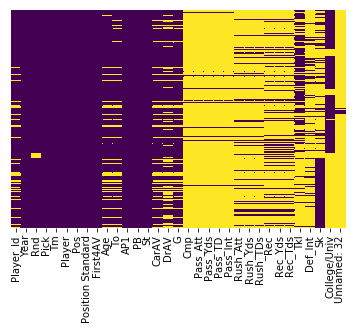

In [6]:
sns.heatmap(nfl_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\Stephanie\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


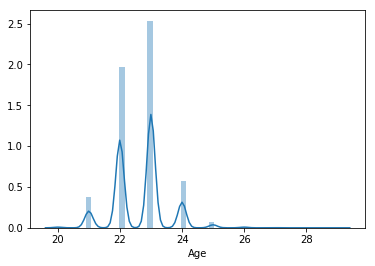

In [8]:
sns.distplot(nfl_data['Age'].dropna(),kde=True,bins=50)

In [13]:
def impute_age(cols):
    Age = cols
    
    if pd.isnull(Age):
        return 22.6
    else: 
        return Age

In [15]:
nfl_data['Age']=nfl_data['Age'].apply(impute_age)

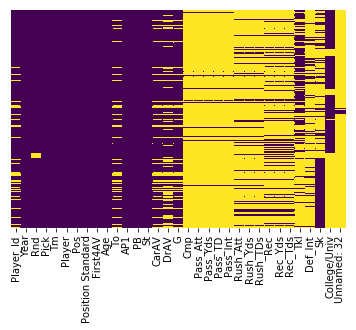

In [18]:
sns.heatmap(nfl_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
nfl_data['College/Univ']

0           Florida St.
1                Oregon
2               Florida
3               Alabama
4                  Iowa
5                   USC
6         West Virginia
7               Clemson
8            Miami (FL)
9               Georgia
10         Michigan St.
11           Washington
12             Stanford
13           Louisville
14            Wisconsin
15          Wake Forest
16               Oregon
17           Washington
18          Florida St.
19                  USC
20            Texas A&M
21             Kentucky
22             Missouri
23              Florida
24           Washington
25      Central Florida
26          Connecticut
27                 Duke
28           Miami (FL)
29          Arizona St.
             ...       
8405                NaN
8406                NaN
8407                NaN
8408                NaN
8409                NaN
8410                NaN
8411                NaN
8412                NaN
8413                NaN
8414                NaN
8415            

In [25]:
def impute_college(cols):
    College = cols
    
    if pd.isnull(College):
        return 0
    else: 
        return 1

In [26]:
nfl_data['College/Univ']=nfl_data['College/Univ'].apply(impute_college)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
8405    0
8406    0
8407    0
8408    0
8409    0
8410    0
8411    0
8412    0
8413    0
8414    0
8415    0
8416    0
8417    0
8418    0
8419    0
8420    0
8421    0
8422    0
8423    0
8424    0
8425    0
8426    0
8427    0
8428    0
8429    0
8430    0
8431    0
8432    0
8433    0
8434    0
Name: College/Univ, Length: 8435, dtype: int64

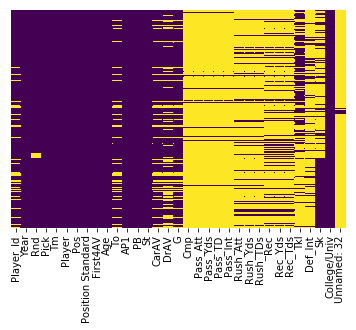

In [28]:
sns.heatmap(nfl_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
nfl_data['Position Standard'].unique()

array(['QB', 'LB', 'WR', 'T', 'DE', 'RB', 'DB', 'DT', 'C', 'G', 'TE',
       'FB', 'P', 'LS', 'K'], dtype=object)

In [32]:
nfl_data['G'].mean()

64.51495726495726

In [33]:
def impute_G(cols):
    Games_Played = cols
    
    if pd.isnull(Games_Played):
        return 64.52
    else: 
        return Games_Played

In [34]:
nfl_data['G']=nfl_data['G'].apply(impute_G)

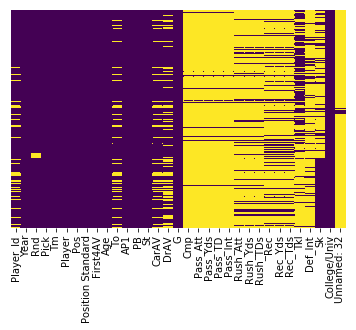

In [35]:
sns.heatmap(nfl_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
nfl_data['G'].unique()

array([ 26.  ,  23.  ,  10.  ,  27.  ,   4.  ,  25.  ,  21.  ,  24.  ,
        22.  ,  15.  ,  18.  ,  19.  ,  14.  ,  20.  ,  64.52,   9.  ,
        12.  ,  11.  ,   8.  ,   1.  ,   2.  ,  13.  ,   7.  ,   6.  ,
        17.  ,  16.  ,   3.  ,   5.  ,  42.  ,  40.  ,  31.  ,  41.  ,
        37.  ,  35.  ,  32.  ,  29.  ,  43.  ,  39.  ,  33.  ,  36.  ,
        34.  ,  30.  ,  38.  ,  28.  ,  56.  ,  48.  ,  54.  ,  53.  ,
        44.  ,  52.  ,  47.  ,  57.  ,  55.  ,  58.  ,  59.  ,  46.  ,
        45.  ,  51.  ,  50.  ,  49.  ,  65.  ,  66.  ,  72.  ,  74.  ,
        71.  ,  63.  ,  73.  ,  69.  ,  68.  ,  62.  ,  60.  ,  64.  ,
        61.  ,  70.  ,  67.  ,  75.  ,  87.  ,  82.  ,  80.  ,  86.  ,
        90.  ,  88.  ,  83.  ,  79.  ,  77.  ,  91.  ,  76.  ,  84.  ,
        89.  ,  81.  ,  78.  , 104.  ,  93.  ,  85.  , 106.  ,  97.  ,
        94.  ,  99.  ,  95.  ,  92.  ,  96.  , 101.  ,  98.  , 102.  ,
       116.  , 112.  , 105.  , 113.  , 111.  , 110.  , 107.  , 109.  ,
      

In [37]:
nfl_data.columns

Index(['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos',
       'Position Standard', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ', 'Unnamed: 32'],
      dtype='object')

In [42]:
def impute_Rnd(cols):
    Rnd = cols
    
    if pd.isnull(Rnd):
        return 0
    elif Rnd == 1.0:
        return 1
    else: 
        return 0

In [43]:
nfl_data['Rnd']=nfl_data['Rnd'].apply(impute_Rnd)

In [45]:
nfl_data['Rnd'].unique()

array([1, 0], dtype=int64)

In [47]:
nfl_data.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,MariMa01,2015,1,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,1,NaN
2,FowlDa00,2015,1,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,1,NaN
3,CoopAm00,2015,1,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,1,NaN
4,ScheBr00,2015,1,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [48]:
X =nfl_data[['First4AV', 'Age','G', 'College/Univ']]

In [49]:
y = nfl_data['Rnd']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

In [55]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95      2247
          1       0.65      0.23      0.34       284

avg / total       0.88      0.90      0.88      2531



In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,predictions)

array([[2212,   35],
       [ 218,   66]], dtype=int64)

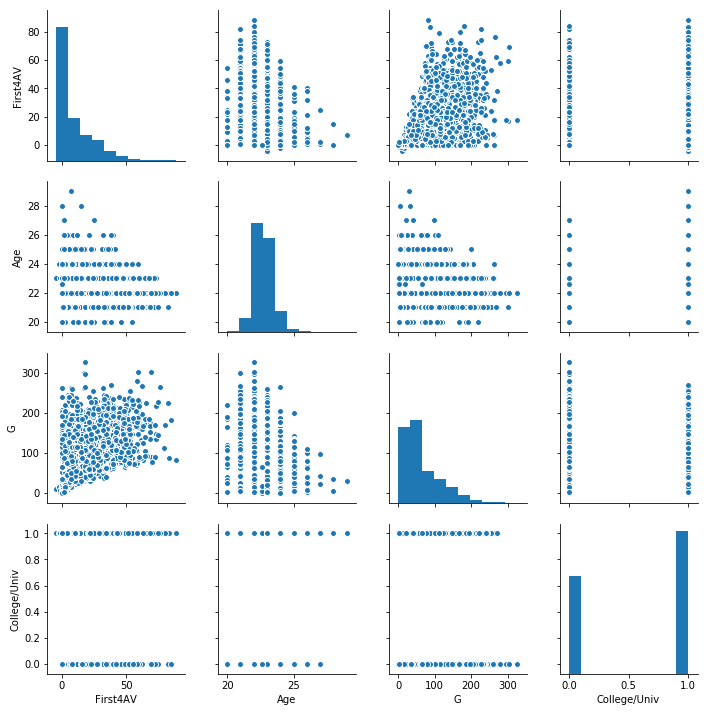

In [62]:
sns.pairplot(X)

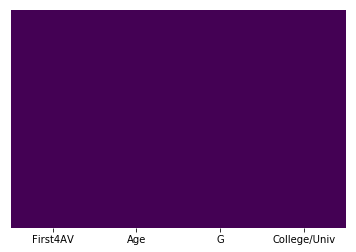

In [63]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

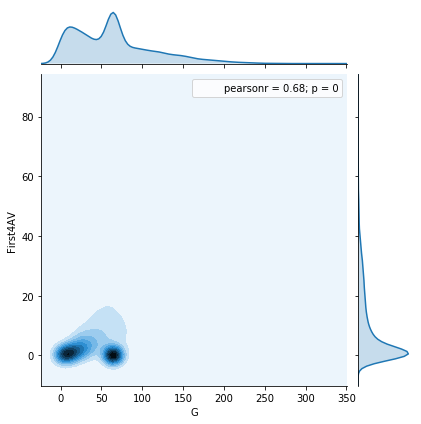

In [75]:
sns.jointplot(nfl_data['G'],nfl_data['First4AV'], kind='kde')